# ANALYSIS OF NAIVE AVERAGE VALUE 

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and exploring the data

In [6]:
df = pd.read_csv('data.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


## STEP 1
Since we have problem with the average of the data, we proceed by exloring the distribution of the corresponding column.
We begin by creating a <b> distplot</b> using seaborn library to check how much the column values deviate from normal distribution. After that, we create box-plot to check if outliers are dominating our dataset. 

C:\Users\karan\anaconda3\envs\shopify\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


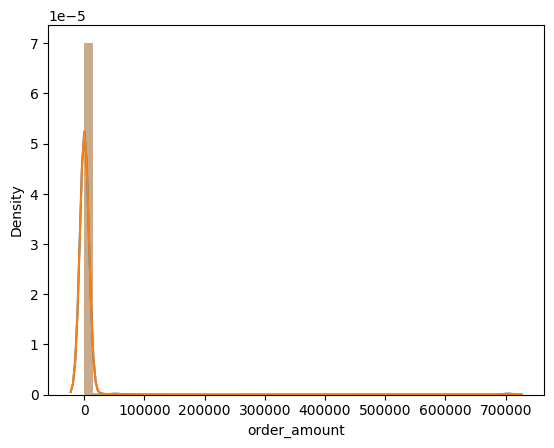

In [5]:
# performing eda on the column of interest
sns.distplot(df['order_amount'])
plt.show()

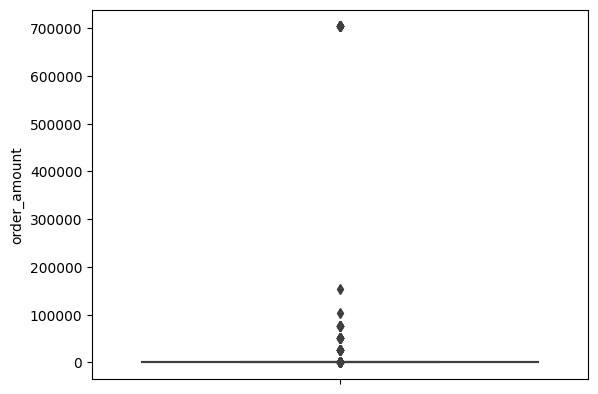

In [11]:
# creating box-plot to check for outliers
sns.boxplot(y = 'order_amount', data = df)
plt.show()

Performing EDA on the column of interest, we can find that the distribution is highly skewed which could be explained due to presence of some very high outlier values as shown by the box plot.

## STEP 2
Here, we do numerical analysis and try to understand the potential reaons of high average value observed.

In [12]:
# calculating the summary statistics of column of interest
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

### CONCLUSION
From the above numerical analysis, we see that the mean is <b>3145.12</b> whcih has been observed by the company. But at the same time , we also observe there maximum value of order amount is <b>704,000</b> which is far away from the mean. The standard deviation observed form the above data is <b>41282</b>, which means that there are significant amount of high order values.

## STEP 3
In this step, we try to find the frequencies of high order amounts to see if we can justify the abmormally high observed mean.


In [81]:
# identifying maximum values and calculating their frequencies
high_order_shops = df.groupby('order_amount')['shop_id'].count().reset_index(name = 'frequency').sort_values('order_amount', ascending = False)
high_order_shops.head(10)

,order_amount,frequency
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


We see that there are significant number of high order amounts. So, our next step is to filter our original data to include only those shops that are receving high orders and see if there is any pattern that can be idenitifed.

## STEP 4
Here, we use top 10 high order amount values to filter the data.

In [53]:
# top 10 high order amounts
high_order_amount = list(high_order_shops['order_amount'][:10])
high_order_amount

[704000, 154350, 102900, 77175, 51450, 25725, 1760, 1408, 1086, 1064]

In [69]:
# filtering original data to include shops receiving bulk order
bulk_orders = df.loc[df['order_amount'].isin(high_order_amount)].sort_values('order_amount', ascending = False)\
.reset_index(drop = True)
bulk_orders.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
3,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
4,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00


### Checking number of shops that receive high orders

In [94]:
shops = bulk_orders.groupby('order_amount')['shop_id'].nunique().reset_index(name = 'num_shops')\
.sort_values('order_amount', ascending = False).reset_index(drop = True)
shops.head()

,order_amount,num_shops
0,704000,1
1,154350,1
2,102900,1
3,77175,1
4,51450,1


Here, we can find that there is only one shop for every different value of high order amount. This could mean that there are some shops that are doing business in bulk.

In [96]:
# zooming in on 3 columns: order_amount, shop_id, user_id and created_at
bulk = bulk_orders.loc[:, ['order_amount', 'shop_id', 'user_id', 'created_at']]
bulk.head(10)

,order_amount,shop_id,user_id,created_at
0,704000,42,607,2017-03-07 4:00:00
1,704000,42,607,2017-03-28 4:00:00
2,704000,42,607,2017-03-17 4:00:00
3,704000,42,607,2017-03-19 4:00:00
4,704000,42,607,2017-03-04 4:00:00
5,704000,42,607,2017-03-11 4:00:00
6,704000,42,607,2017-03-28 4:00:00
7,704000,42,607,2017-03-28 4:00:00
8,704000,42,607,2017-03-24 4:00:00
9,704000,42,607,2017-03-15 4:00:00


### CONCLUSION
From the above, we can see that shops are receving huge orders from the same user with a good frequency. This is means that shop is doing business on whole-sale level. This explains the presence of outliers in our dataset.

### QUESTION 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

<b>a</b> Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. <br>
<b>Ans</b> From above analysis, we note that there are some shops that are receiving significant number of high amount orders by doing business in bulk. This explains why we are observing the mean as high as <b>3145.13</b>. <br>

<b> b </b> What metric would you report for this dataset? <br>
<b>Ans</b> I wouldl suggest to use <b>mode</b> or the most frequent value to be used as metric. <b>Taylor Holiday</b>, co-founder of <b>Common Thread Coolective</b> has also explained how reporting mode as a metric could help is devising the business strategy in a discussion [here](https://www.shopify.com.ng/blog/average-order-value#averageorder).

## STEP 5
Here, we calculate the most frequently occuring value for the order amount that could be used as a metric.

In [97]:
mode = df['order_amount'].mode()
mode

0    153
dtype: int64

<b>c</b> What is its value? <br>
<b>Ans</b> The most frequent occuring order amount in the dataset is <b>153</b> and this is the value that should be taken into consideration while devising a business strategy in such a situation.

## QUESTION 2
 For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below. <br>
 
 <b>a</b> How many orders were shipped by Speedy Express in total? <br>
 <b>Ans</b> We can use inner join on <b>Orders</b> and <b>Shippers</b> tables on <b>ShipperID</b> column. The screen shot of my result is as follows:
 ![alt_text](1.png "Title")
 
  <b>b</b> What is the last name of the employee with the most orders? <br>
  <b>Ans</b> This can solved by joining <b>Employees</b> and <b>Orders</b> table on <b>EmployeeID</b>. The screen shot of my result is as foolows:
   ![alt_text](2.png "Title")
   
   <b>c</b> What product was ordered the most by customers in Germany? <br>
   <b>Ans </b> The query for this part is as follows:
      ![alt_text](sql3.png "Title")
   